In [113]:
import matplotlib.pyplot as plt
import numpy as np
def convert_to_signed_16bit(value):
    if value >= 32768:
        return value - 65536
    else:
        return value
# Text dosyasından veriyi okuma ve işleme fonksiyonu
def read_and_process_data(file_path):
    timestamps = []
    ax_values = []
    ay_values = []
    az_values = []
    gx_values = []
    gy_values = []
    gz_values = []
    
    with open(file_path, 'r') as file:
        for line in file:
            values = line.split()
            timestamps.append(int(values[0]))
            ax_values.append(convert_to_signed_16bit(int(values[2]) )/ 16384.0)
            ay_values.append(convert_to_signed_16bit(int(values[4]) )/ 16384.0)
            az_values.append(convert_to_signed_16bit(int(values[6]) )/ 16384.0)
            gx_values.append(convert_to_signed_16bit(int(values[8]) )/ 131.0)
            gy_values.append(convert_to_signed_16bit(int(values[10]) )/ 131.0)
            gz_values.append(convert_to_signed_16bit(int(values[12]) )/ 131.0)
    timestamps = timestamps- timestamps[0] * np.ones(len(timestamps))
    return timestamps, ax_values, ay_values, az_values, gx_values, gy_values, gz_values


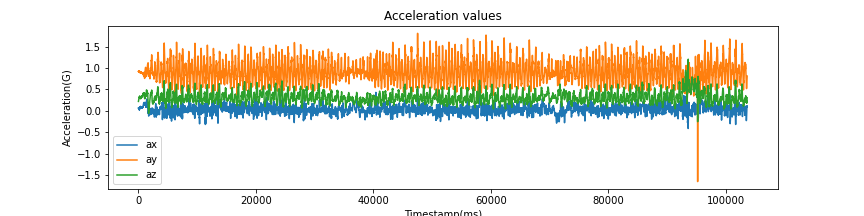

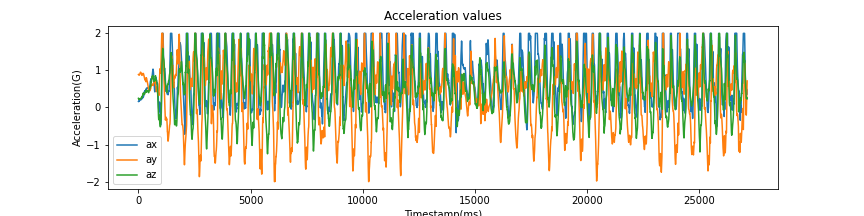

In [122]:
file_path = 'esra_cevrede_yuruyor.txt'
timestamps, ax, ay, az, gx, gy, gz = read_and_process_data(file_path)
file_path1 = 'esra_cevrede_kosuyor.txt'
timestamps1, ax1, ay1, az1, gx1, gy1, gz1 = read_and_process_data(file_path1)

#plot the data ax,ay and az
%matplotlib widget
plt.figure(figsize=(12, 3))
plt.plot(timestamps, ax, label='ax')
plt.plot(timestamps, ay, label='ay')
plt.plot(timestamps, az, label='az')
plt.legend()
plt.xlabel('Timestamp(ms)')
plt.ylabel('Acceleration(G)')
plt.title('Acceleration values')
plt.show()


plt.figure(figsize=(12, 3))
plt.plot(timestamps1, ax1, label='ax')
plt.plot(timestamps1, ay1, label='ay')
plt.plot(timestamps1, az1, label='az')
plt.legend()
plt.xlabel('Timestamp(ms)')
plt.ylabel('Acceleration(G)')
plt.title('Acceleration values')
plt.show()



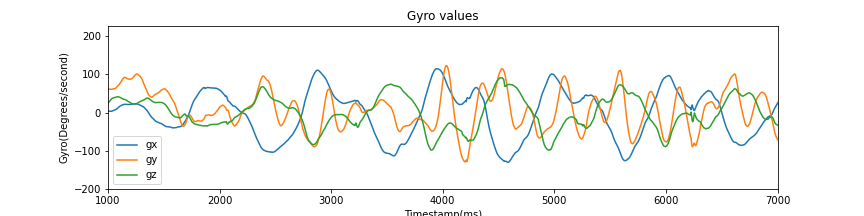

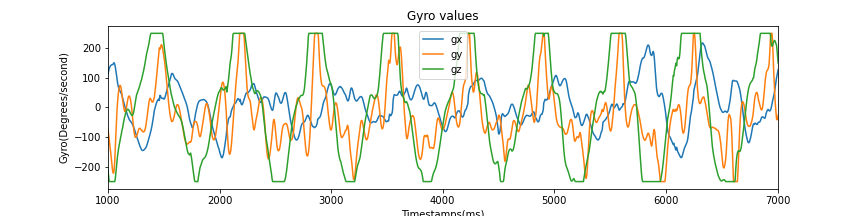

In [123]:
#plot the data gx,gy and gz
%matplotlib widget
plt.figure(figsize=(12, 3))
plt.plot(timestamps, gx, label='gx')
plt.plot(timestamps, gy, label='gy')
plt.plot(timestamps, gz, label='gz')
plt.legend()
plt.xlabel('Timestamp(ms)')
plt.ylabel('Gyro(Degrees/second)')
plt.title('Gyro values')
plt.xlim([1000,7000])
plt.show()

plt.figure(figsize=(12, 3))
plt.plot(timestamps1, gx1, label='gx')
plt.plot(timestamps1, gy1, label='gy')
plt.plot(timestamps1, gz1, label='gz')
plt.legend()
plt.xlabel('Timestamps(ms)')
plt.ylabel('Gyro(Degrees/second)')
plt.title('Gyro values')
plt.xlim([1000,7000])
plt.show()


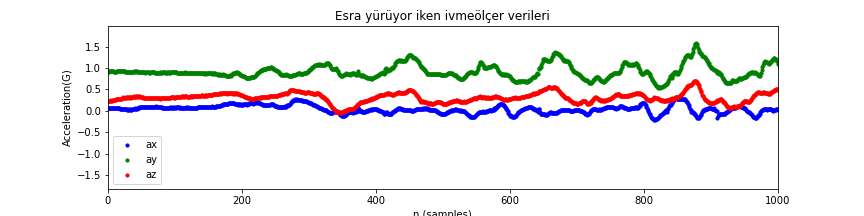

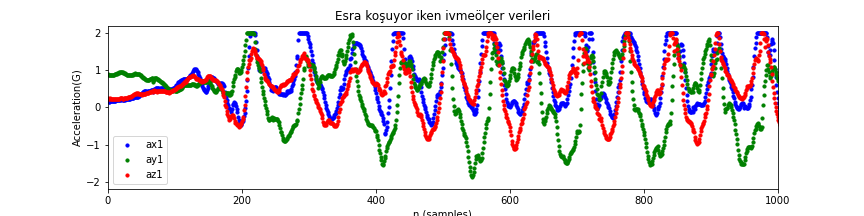

In [124]:
#plot the data ax,ay and az
%matplotlib widget
n = np.arange(0,len(ax))
plt.figure(figsize=(12, 3))
plt.scatter(n, ax, label='ax', color='b',s=10)
plt.scatter(n, ay, label='ay', color='g',s=10)
plt.scatter(n, az, label='az', color='r',s=10)
plt.legend()
plt.title("Esra yürüyor iken ivmeölçer verileri")
plt.xlabel('n (samples)')
plt.ylabel('Acceleration(G)')
plt.xlim([0,1000])
plt.show()


n1 = np.arange(0,len(ax1))
plt.figure(figsize=(12, 3))
plt.scatter(n1, ax1, label='ax1', color='b', s=10)
plt.scatter(n1, ay1, label='ay1', color='g',s=10)
plt.scatter(n1, az1, label='az1', color='r',s=10)
plt.legend()
plt.title("Esra koşuyor iken ivmeölçer verileri")
plt.xlabel('n (samples)')
plt.ylabel('Acceleration(G)')
plt.xlim([0,1000])
plt.show()



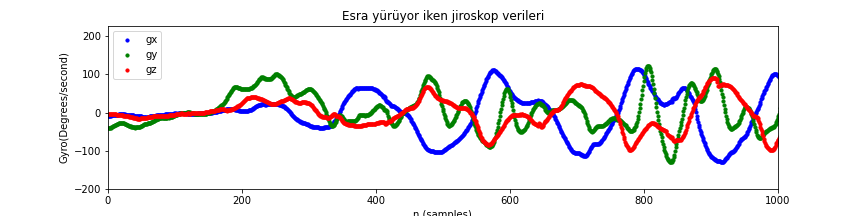

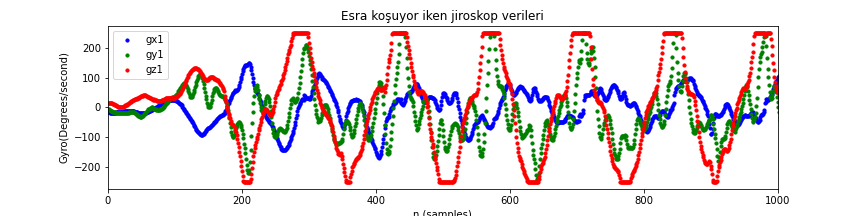

In [125]:
#plot the data gx,gy and gz
%matplotlib widget
plt.figure(figsize=(12, 3))
plt.scatter(n, gx, label='gx',color='b', s = 10)
plt.scatter(n, gy, label='gy',color='g', s = 10)
plt.scatter(n, gz, label='gz',color='r', s = 10)
plt.legend()
plt.title("Esra yürüyor iken jiroskop verileri")
plt.xlabel('n (samples)')
plt.ylabel('Gyro(Degrees/second)')
plt.xlim([0,1000])
plt.show()

plt.figure(figsize=(12, 3))
plt.scatter(n1, gx1, label='gx1',color='b', s = 10)
plt.scatter(n1, gy1, label='gy1',color='g', s = 10)
plt.scatter(n1, gz1, label='gz1',color='r',s = 10)
plt.legend()
plt.title("Esra koşuyor iken jiroskop verileri")
plt.xlabel('n (samples)')
plt.ylabel('Gyro(Degrees/second)')
plt.xlim([0,1000])
plt.show()

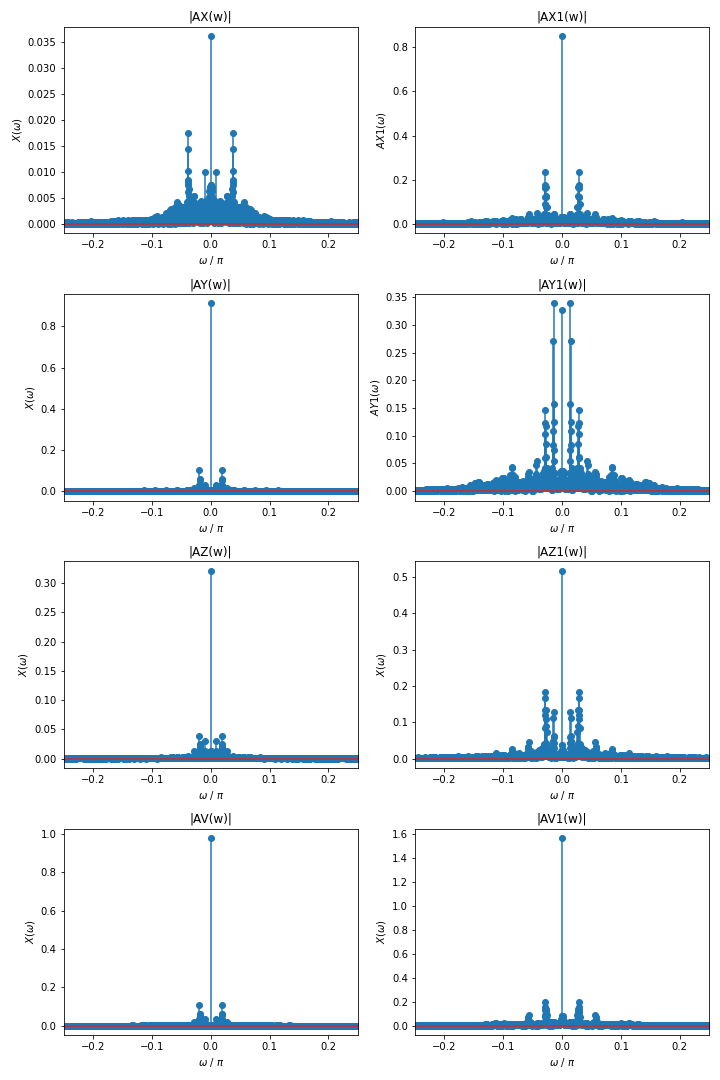

In [126]:
import matplotlib.pyplot as plt
import numpy as np
import mplcursors

%matplotlib widget
N = len(ax)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AX = np.fft.fftshift(np.fft.fft(ax, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.figure(figsize = (10,15))
plt.subplot(4,2,1)
markerline_ax, stemlines_ax, baseline_ax = plt.stem(w/np.pi, abs(AX), label='AX(w)')
plt.xlim([-0.25,0.25])
plt.title("|AX(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(ay)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AY = np.fft.fftshift(np.fft.fft(ay, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,3)
markerline_ay, stemlines_ay, baseline_ay = plt.stem(w/np.pi, abs(AY), label='AY(w)')
plt.xlim([-0.25,0.25])
plt.title("|AY(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(az)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AZ = np.fft.fftshift(np.fft.fft(az, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,5)
markerline_az, stemlines_az, baseline_az = plt.stem(w/np.pi, abs(AZ), label='AZ(w)')
plt.xlim([-0.25,0.25])
plt.title("|AZ(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

avector = np.sqrt(np.array(ax)**2 + np.array(ay)**2 + np.array(az)**2)
N = len(avector)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AV = np.fft.fftshift(np.fft.fft(avector, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,7)
markerline_av, stemlines_av, baseline_av = plt.stem(w/np.pi, abs(AV), label='AV(w)')
plt.xlim([-0.25,0.25])
plt.title("|AV(w)|")
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(ax1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AX1 = np.fft.fftshift(np.fft.fft(ax1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,2)
markerline_ax1, stemlines_ax1, baseline_ax1 = plt.stem(w/np.pi, abs(AX1), label='AX1(w)')
plt.xlim([-0.25,0.25])
plt.title("|AX1(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$AX1(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(ay1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AY1 = np.fft.fftshift(np.fft.fft(ay1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,4)
markerline_ay1, stemlines_ay1, baseline_ay1 = plt.stem(w/np.pi, abs(AY1), label='AY1(w)')
plt.xlim([-0.25,0.25])
plt.title("|AY1(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$AY1(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(az1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AZ1 = np.fft.fftshift(np.fft.fft(az1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,6)
markerline_az1, stemlines_az1, baseline_az1 = plt.stem(w/np.pi, abs(AZ1), label='AZ1(w)')
plt.xlim([-0.25,0.25])
plt.title("|AZ1(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

avector1 = np.sqrt(np.array(ax1)**2 + np.array(ay1)**2 + np.array(az1)**2)
N = len(avector1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AV1 = np.fft.fftshift(np.fft.fft(avector1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,8)
markerline_av1, stemlines_av1, baseline_av1 = plt.stem(w/np.pi, abs(AV1), label='AV1(w)')
plt.xlim([-0.25,0.25])
plt.title("|AV1(w)|")
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

plt.tight_layout()

# Add mplcursors to enable point selection
mplcursors.cursor([markerline_ax, markerline_ay, markerline_az, markerline_av, markerline_ax1, markerline_ay1, markerline_az1, markerline_av1], hover=True)

plt.show()


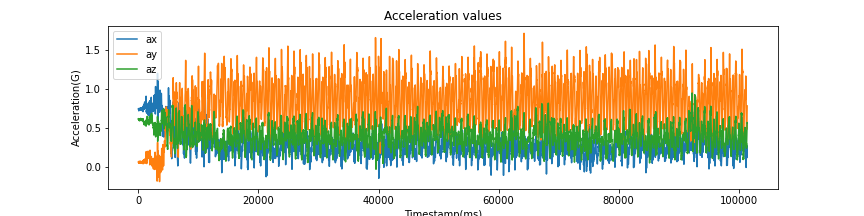

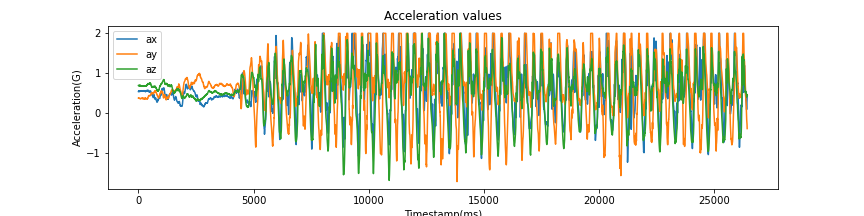

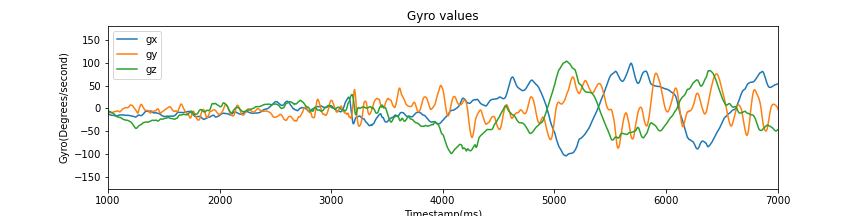

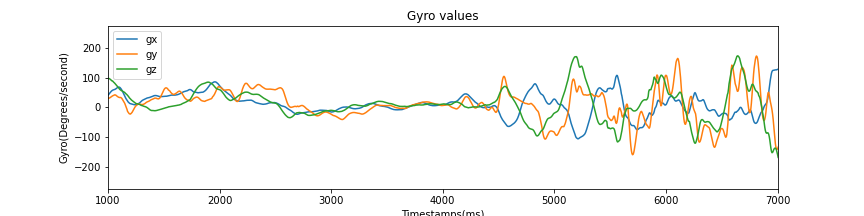

In [127]:
file_path = 'fuad_cevrede_yuruyor.txt'
timestamps, ax, ay, az, gx, gy, gz = read_and_process_data(file_path)
file_path1 = 'fuad_cevrede_kosuyor.txt'
timestamps1, ax1, ay1, az1, gx1, gy1, gz1 = read_and_process_data(file_path1)

#plot the data ax,ay and az
%matplotlib widget
plt.figure(figsize=(12, 3))
plt.plot(timestamps, ax, label='ax')
plt.plot(timestamps, ay, label='ay')
plt.plot(timestamps, az, label='az')
plt.legend()
plt.xlabel('Timestamp(ms)')
plt.ylabel('Acceleration(G)')
plt.title('Acceleration values')
plt.show()


plt.figure(figsize=(12, 3))
plt.plot(timestamps1, ax1, label='ax')
plt.plot(timestamps1, ay1, label='ay')
plt.plot(timestamps1, az1, label='az')
plt.legend()
plt.xlabel('Timestamp(ms)')
plt.ylabel('Acceleration(G)')
plt.title('Acceleration values')
plt.show()

#plot the data gx,gy and gz

plt.figure(figsize=(12, 3))
plt.plot(timestamps, gx, label='gx')
plt.plot(timestamps, gy, label='gy')
plt.plot(timestamps, gz, label='gz')
plt.legend()
plt.xlabel('Timestamp(ms)')
plt.ylabel('Gyro(Degrees/second)')
plt.title('Gyro values')
plt.xlim([1000,7000])
plt.show()

plt.figure(figsize=(12, 3))
plt.plot(timestamps1, gx1, label='gx')
plt.plot(timestamps1, gy1, label='gy')
plt.plot(timestamps1, gz1, label='gz')
plt.legend()
plt.xlabel('Timestamps(ms)')
plt.ylabel('Gyro(Degrees/second)')
plt.title('Gyro values')
plt.xlim([1000,7000])
plt.show()



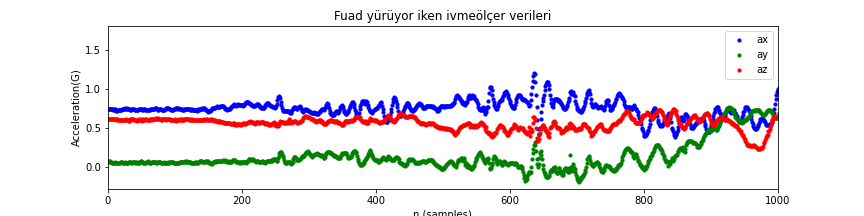

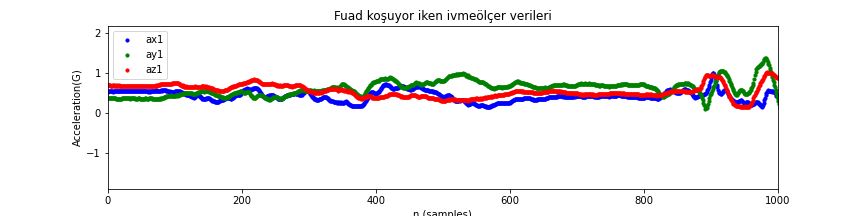

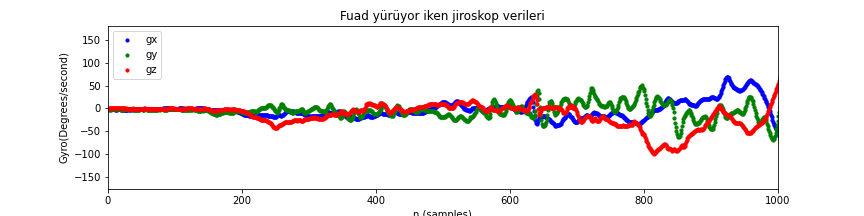

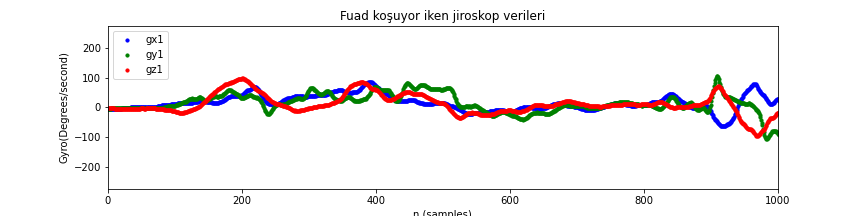

In [129]:
#plot the data ax,ay and az
%matplotlib widget
n = np.arange(0,len(ax))
plt.figure(figsize=(12, 3))
plt.scatter(n, ax, label='ax', color='b',s=10)
plt.scatter(n, ay, label='ay', color='g',s=10)
plt.scatter(n, az, label='az', color='r',s=10)
plt.legend()
plt.title("Fuad yürüyor iken ivmeölçer verileri")
plt.xlabel('n (samples)')
plt.ylabel('Acceleration(G)')
plt.xlim([0,1000])
plt.show()


n1 = np.arange(0,len(ax1))
plt.figure(figsize=(12, 3))
plt.scatter(n1, ax1, label='ax1', color='b', s=10)
plt.scatter(n1, ay1, label='ay1', color='g',s=10)
plt.scatter(n1, az1, label='az1', color='r',s=10)
plt.legend()
plt.title("Fuad koşuyor iken ivmeölçer verileri")
plt.xlabel('n (samples)')
plt.ylabel('Acceleration(G)')
plt.xlim([0,1000])
plt.show()

#plot the data gx,gy and gz
plt.figure(figsize=(12, 3))
plt.scatter(n, gx, label='gx',color='b', s = 10)
plt.scatter(n, gy, label='gy',color='g', s = 10)
plt.scatter(n, gz, label='gz',color='r', s = 10)
plt.legend()
plt.title("Fuad yürüyor iken jiroskop verileri")
plt.xlabel('n (samples)')
plt.ylabel('Gyro(Degrees/second)')
plt.xlim([0,1000])
plt.show()

plt.figure(figsize=(12, 3))
plt.scatter(n1, gx1, label='gx1',color='b', s = 10)
plt.scatter(n1, gy1, label='gy1',color='g', s = 10)
plt.scatter(n1, gz1, label='gz1',color='r',s = 10)
plt.legend()
plt.title("Fuad koşuyor iken jiroskop verileri")
plt.xlabel('n (samples)')
plt.ylabel('Gyro(Degrees/second)')
plt.xlim([0,1000])
plt.show()


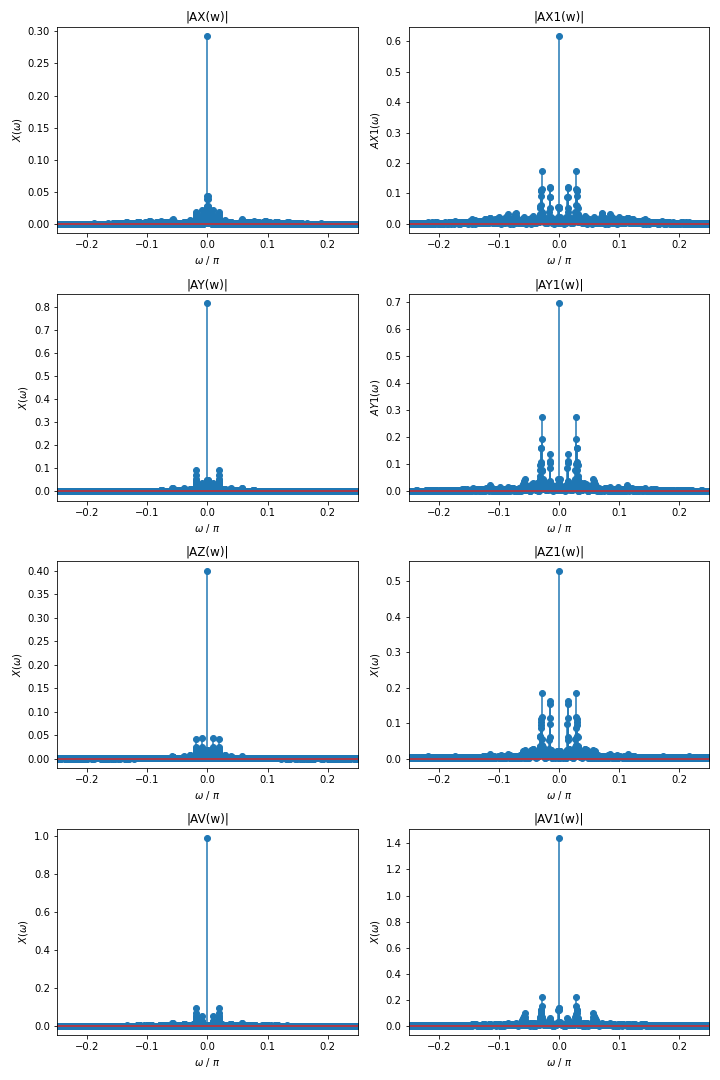

In [130]:
import matplotlib.pyplot as plt
import numpy as np
import mplcursors

%matplotlib widget
N = len(ax)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AX = np.fft.fftshift(np.fft.fft(ax, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.figure(figsize = (10,15))
plt.subplot(4,2,1)
markerline_ax, stemlines_ax, baseline_ax = plt.stem(w/np.pi, abs(AX), label='AX(w)')
plt.xlim([-0.25,0.25])
plt.title("|AX(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(ay)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AY = np.fft.fftshift(np.fft.fft(ay, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,3)
markerline_ay, stemlines_ay, baseline_ay = plt.stem(w/np.pi, abs(AY), label='AY(w)')
plt.xlim([-0.25,0.25])
plt.title("|AY(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(az)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AZ = np.fft.fftshift(np.fft.fft(az, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,5)
markerline_az, stemlines_az, baseline_az = plt.stem(w/np.pi, abs(AZ), label='AZ(w)')
plt.xlim([-0.25,0.25])
plt.title("|AZ(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

avector = np.sqrt(np.array(ax)**2 + np.array(ay)**2 + np.array(az)**2)
N = len(avector)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AV = np.fft.fftshift(np.fft.fft(avector, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,7)
markerline_av, stemlines_av, baseline_av = plt.stem(w/np.pi, abs(AV), label='AV(w)')
plt.xlim([-0.25,0.25])
plt.title("|AV(w)|")
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(ax1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AX1 = np.fft.fftshift(np.fft.fft(ax1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,2)
markerline_ax1, stemlines_ax1, baseline_ax1 = plt.stem(w/np.pi, abs(AX1), label='AX1(w)')
plt.xlim([-0.25,0.25])
plt.title("|AX1(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$AX1(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(ay1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AY1 = np.fft.fftshift(np.fft.fft(ay1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,4)
markerline_ay1, stemlines_ay1, baseline_ay1 = plt.stem(w/np.pi, abs(AY1), label='AY1(w)')
plt.xlim([-0.25,0.25])
plt.title("|AY1(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$AY1(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(az1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AZ1 = np.fft.fftshift(np.fft.fft(az1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,6)
markerline_az1, stemlines_az1, baseline_az1 = plt.stem(w/np.pi, abs(AZ1), label='AZ1(w)')
plt.xlim([-0.25,0.25])
plt.title("|AZ1(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

avector1 = np.sqrt(np.array(ax1)**2 + np.array(ay1)**2 + np.array(az1)**2)
N = len(avector1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AV1 = np.fft.fftshift(np.fft.fft(avector1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,8)
markerline_av1, stemlines_av1, baseline_av1 = plt.stem(w/np.pi, abs(AV1), label='AV1(w)')
plt.xlim([-0.25,0.25])
plt.title("|AV1(w)|")
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

plt.tight_layout()

# Add mplcursors to enable point selection
mplcursors.cursor([markerline_ax, markerline_ay, markerline_az, markerline_av, markerline_ax1, markerline_ay1, markerline_az1, markerline_av1], hover=True)

plt.show()


## güneyden alınan veriler

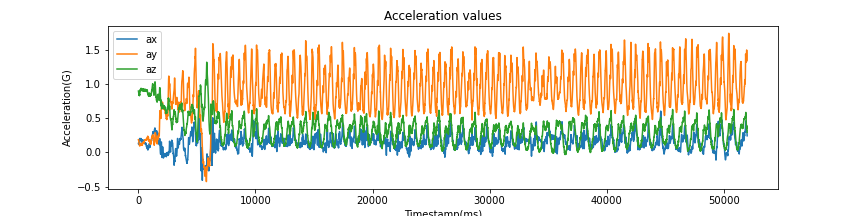

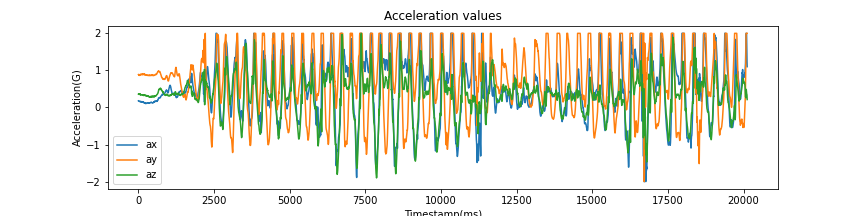

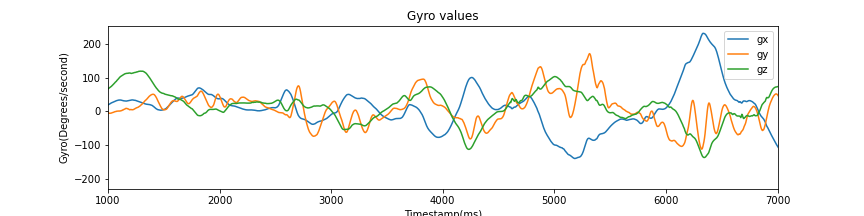

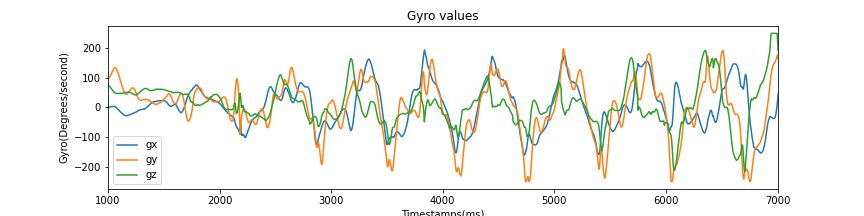

In [131]:
file_path = 'guney_cevrede_yuruyor.txt'
timestamps, ax, ay, az, gx, gy, gz = read_and_process_data(file_path)
file_path1 = 'guney_cevrede_kosuyor.txt'
timestamps1, ax1, ay1, az1, gx1, gy1, gz1 = read_and_process_data(file_path1)

#plot the data ax,ay and az
%matplotlib widget
plt.figure(figsize=(12, 3))
plt.plot(timestamps, ax, label='ax')
plt.plot(timestamps, ay, label='ay')
plt.plot(timestamps, az, label='az')
plt.legend()
plt.xlabel('Timestamp(ms)')
plt.ylabel('Acceleration(G)')
plt.title('Acceleration values')
plt.show()


plt.figure(figsize=(12, 3))
plt.plot(timestamps1, ax1, label='ax')
plt.plot(timestamps1, ay1, label='ay')
plt.plot(timestamps1, az1, label='az')
plt.legend()
plt.xlabel('Timestamp(ms)')
plt.ylabel('Acceleration(G)')
plt.title('Acceleration values')
plt.show()

#plot the data gx,gy and gz

plt.figure(figsize=(12, 3))
plt.plot(timestamps, gx, label='gx')
plt.plot(timestamps, gy, label='gy')
plt.plot(timestamps, gz, label='gz')
plt.legend()
plt.xlabel('Timestamp(ms)')
plt.ylabel('Gyro(Degrees/second)')
plt.title('Gyro values')
plt.xlim([1000,7000])
plt.show()

plt.figure(figsize=(12, 3))
plt.plot(timestamps1, gx1, label='gx')
plt.plot(timestamps1, gy1, label='gy')
plt.plot(timestamps1, gz1, label='gz')
plt.legend()
plt.xlabel('Timestamps(ms)')
plt.ylabel('Gyro(Degrees/second)')
plt.title('Gyro values')
plt.xlim([1000,7000])
plt.show()



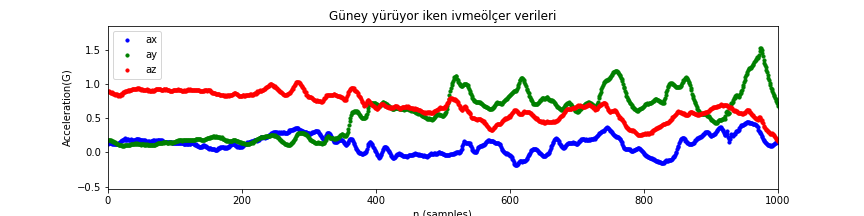

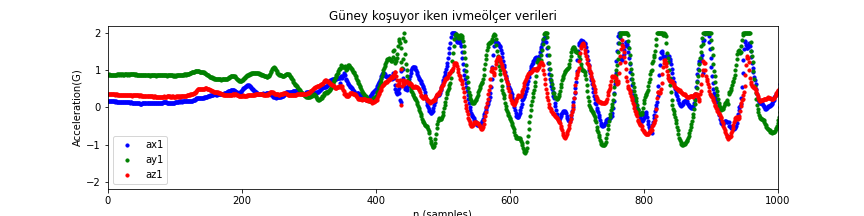

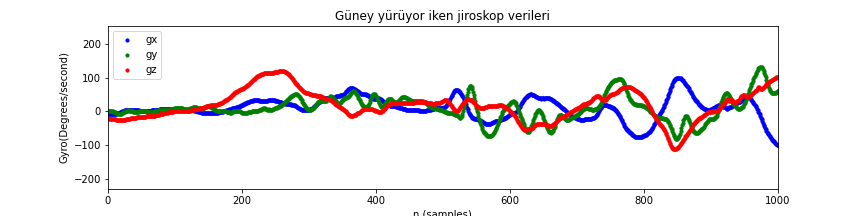

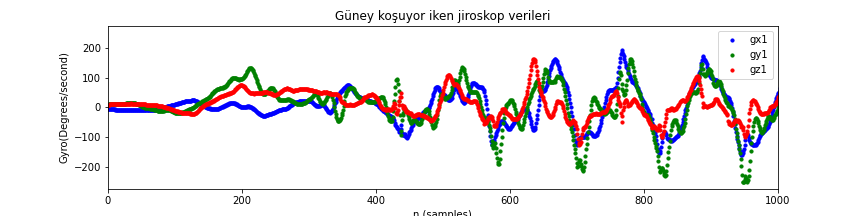

In [133]:
#plot the data ax,ay and az
%matplotlib widget
n = np.arange(0,len(ax))
plt.figure(figsize=(12, 3))
plt.scatter(n, ax, label='ax', color='b',s=10)
plt.scatter(n, ay, label='ay', color='g',s=10)
plt.scatter(n, az, label='az', color='r',s=10)
plt.legend()
plt.title("Güney yürüyor iken ivmeölçer verileri")
plt.xlabel('n (samples)')
plt.ylabel('Acceleration(G)')
plt.xlim([0,1000])
plt.show()


n1 = np.arange(0,len(ax1))
plt.figure(figsize=(12, 3))
plt.scatter(n1, ax1, label='ax1', color='b', s=10)
plt.scatter(n1, ay1, label='ay1', color='g',s=10)
plt.scatter(n1, az1, label='az1', color='r',s=10)
plt.legend()
plt.title("Güney koşuyor iken ivmeölçer verileri")
plt.xlabel('n (samples)')
plt.ylabel('Acceleration(G)')
plt.xlim([0,1000])
plt.show()

#plot the data gx,gy and gz
plt.figure(figsize=(12, 3))
plt.scatter(n, gx, label='gx',color='b', s = 10)
plt.scatter(n, gy, label='gy',color='g', s = 10)
plt.scatter(n, gz, label='gz',color='r', s = 10)
plt.legend()
plt.title("Güney yürüyor iken jiroskop verileri")
plt.xlabel('n (samples)')
plt.ylabel('Gyro(Degrees/second)')
plt.xlim([0,1000])
plt.show()

plt.figure(figsize=(12, 3))
plt.scatter(n1, gx1, label='gx1',color='b', s = 10)
plt.scatter(n1, gy1, label='gy1',color='g', s = 10)
plt.scatter(n1, gz1, label='gz1',color='r',s = 10)
plt.legend()
plt.title("Güney koşuyor iken jiroskop verileri")
plt.xlabel('n (samples)')
plt.ylabel('Gyro(Degrees/second)')
plt.xlim([0,1000])
plt.show()


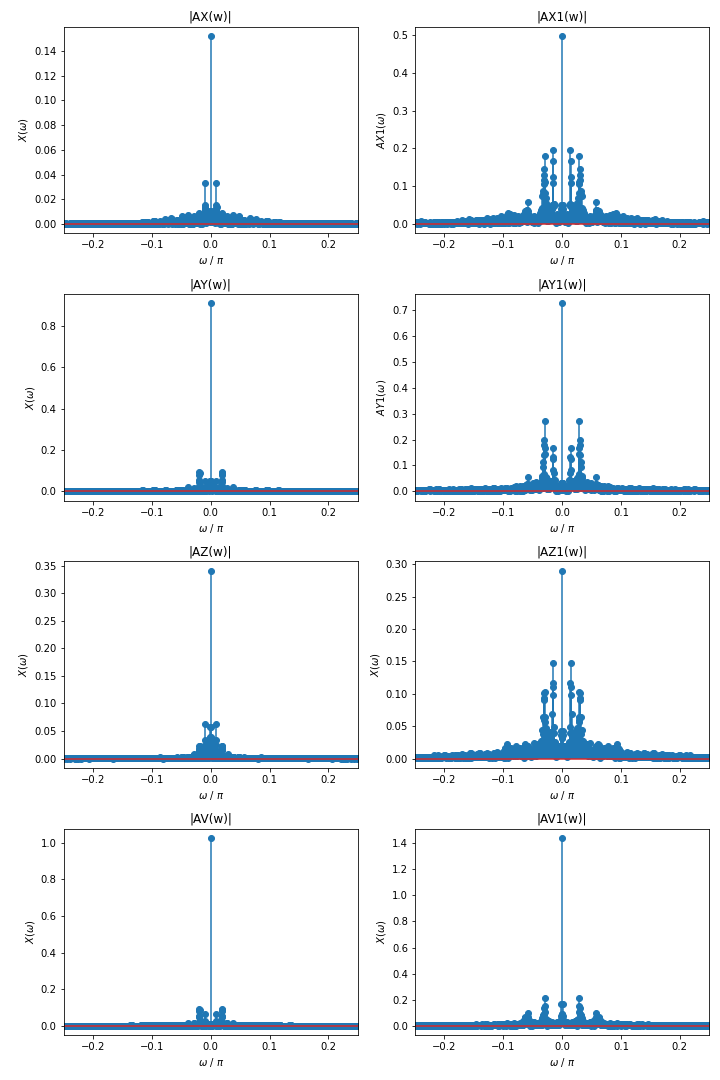

In [134]:
import matplotlib.pyplot as plt
import numpy as np
import mplcursors

%matplotlib widget
N = len(ax)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AX = np.fft.fftshift(np.fft.fft(ax, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.figure(figsize = (10,15))
plt.subplot(4,2,1)
markerline_ax, stemlines_ax, baseline_ax = plt.stem(w/np.pi, abs(AX), label='AX(w)')
plt.xlim([-0.25,0.25])
plt.title("|AX(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(ay)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AY = np.fft.fftshift(np.fft.fft(ay, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,3)
markerline_ay, stemlines_ay, baseline_ay = plt.stem(w/np.pi, abs(AY), label='AY(w)')
plt.xlim([-0.25,0.25])
plt.title("|AY(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(az)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AZ = np.fft.fftshift(np.fft.fft(az, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,5)
markerline_az, stemlines_az, baseline_az = plt.stem(w/np.pi, abs(AZ), label='AZ(w)')
plt.xlim([-0.25,0.25])
plt.title("|AZ(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

avector = np.sqrt(np.array(ax)**2 + np.array(ay)**2 + np.array(az)**2)
N = len(avector)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AV = np.fft.fftshift(np.fft.fft(avector, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,7)
markerline_av, stemlines_av, baseline_av = plt.stem(w/np.pi, abs(AV), label='AV(w)')
plt.xlim([-0.25,0.25])
plt.title("|AV(w)|")
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(ax1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AX1 = np.fft.fftshift(np.fft.fft(ax1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,2)
markerline_ax1, stemlines_ax1, baseline_ax1 = plt.stem(w/np.pi, abs(AX1), label='AX1(w)')
plt.xlim([-0.25,0.25])
plt.title("|AX1(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$AX1(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(ay1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AY1 = np.fft.fftshift(np.fft.fft(ay1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,4)
markerline_ay1, stemlines_ay1, baseline_ay1 = plt.stem(w/np.pi, abs(AY1), label='AY1(w)')
plt.xlim([-0.25,0.25])
plt.title("|AY1(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$AY1(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

N = len(az1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AZ1 = np.fft.fftshift(np.fft.fft(az1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,6)
markerline_az1, stemlines_az1, baseline_az1 = plt.stem(w/np.pi, abs(AZ1), label='AZ1(w)')
plt.xlim([-0.25,0.25])
plt.title("|AZ1(w)|") 
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

avector1 = np.sqrt(np.array(ax1)**2 + np.array(ay1)**2 + np.array(az1)**2)
N = len(avector1)
w= np.arange(-np.pi, np.pi , 2*np.pi/N) # omega ekseninin pi ile +pi arasında tanımlanması
AV1 = np.fft.fftshift(np.fft.fft(avector1, N)/N) # x3[n] ayrık zamanlı işaretin Fourier transformu X3(w)

plt.subplot(4,2,8)
markerline_av1, stemlines_av1, baseline_av1 = plt.stem(w/np.pi, abs(AV1), label='AV1(w)')
plt.xlim([-0.25,0.25])
plt.title("|AV1(w)|")
plt.xlabel("$\omega$ / $\pi$") # grafiğin x ekseninin isimlendirilmesi
plt.ylabel("$X(\omega)$")  # grafiğin y ekseninin isimlendirilmesi

plt.tight_layout()

# Add mplcursors to enable point selection
mplcursors.cursor([markerline_ax, markerline_ay, markerline_az, markerline_av, markerline_ax1, markerline_ay1, markerline_az1, markerline_av1], hover=True)

plt.show()
